### 1. data set preprocessing

* 원본 데이터는 다양한 class가 뒤죽박죽 섞여있었음. 이를, class별로 정리하는 전처리
* fold0 = air_conditioner
* fold1 = car_horn
* fold2 = children_playing
* fold3 = dog_bark
* fold4 = drilling
* fold5 = engine_idling
* fold6 = gun_shot
* fold7 = jackhammer
* fold8 = siren
* fold9 = street_music

In [ ]:
import glob
import shutil

arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name = ["air_conditioner", "car_horn", "children_playing", "dog_bark",
       "drilling", "engine_idlling", "gun_shot", "jackhammer", "siren", "street_music"]

def name(num):
    arr[num] = arr[num] + 1
    return Name[num] + str(arr[num])

In [ ]:
for i in range(1, 11):
    folderName = "fold"+str(i)
    fileList = glob.glob("1_origindata/"+folderName+"/*.wav")
    for j in range(len(fileList)):
        tempSplit = fileList[j].split("-")
        originfileName = fileList[j]
        newfileName = "2_data/fold"+str(tempSplit[1])+"/"+name(int(tempSplit[1]))+".wav"
        shutil.copy(originfileName, newfileName)
        print("Success copy", end = " : ")
        print(originfileName + " -> " + newfileName)
    print("/// " + folderName + " finish..")
print("all finish...")

### 2. convert wav to jpg
* librosa 라이브러리르 이용하여 wav파일을 jpg파일로 변환

* 시각화 결과 0, 2, 5, 7, 9번 class는 무의미하고 판별이 어려울 것으로 판단
* 1, 3, 4, 6, 8번 class로 classifier 개발 시작. + 위의 5개 class는 배경 백색 소음 역할 수행

* 즉, 디렉토리는 0 to 9가 아닌, 0 to 4로 재 정렬된다.
* fold0 : car_horn
* fold1 : dog_bark
* fold2 : drilling
* fold3 : gun_shot
* fold4 : siren

* 단, 학습 완료 후, 프로젝트 진행이 안정화되었을 때, 10개 class판별을 위한 upgrade 진행을 할 수 있으며, 이를 위한 origin data는 보관한다.

In [ ]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import glob
%matplotlib inline

In [ ]:
for i in range(10):
    folderName = "fold" + str(i)
    print("======"+folderName+"======")
    fileList = glob.glob("2_data/"+folderName+"/*.wav")
    for j in range(len(fileList)):
        tempSplit = fileList[j].split(".")
        tempSplit2 = tempSplit[0].split("\\")
        fileName = tempSplit2[-1]
        
        plt.figure()
        y, sr = librosa.load(fileList[j])
        S = np.abs(librosa.stft(y))
        librosa.display.specshow(librosa.power_to_db(S**2, ref = np.max),
                                 sr = sr, y_axis = 'log', x_axis = 'time')
        #plt.colorbar(format = '%+2.0f dB')
        plt.title('Log-Power spectrogram')
        #plt.show()
        print("Save file Complete : 3_image/"+folderName+"/"+fileName+".jpg")
        plt.savefig("3_image/"+folderName+"/"+fileName+".jpg")
        plt.close()

In [ ]:
plt.figure()
y, sr = librosa.load("파일경로")
S = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.power_to_db(S**2, ref = np.max),
                         sr = sr, y_axis = 'log', x_axis = 'time')
plt.show()
plt.close()

In [ ]:
# 시각화 origin code backup
"""
plt.figure()
y, sr = librosa.load(fileList[0])
S = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.power_to_db(S**2, ref = np.max),
                         sr = sr, y_axis = 'log', x_axis = 'time')
plt.colorbar(format = '%+2.0f dB')
plt.title('Log-Power spectrogram')
plt.show()
"""

### 3. jpg 사진 자르기
* 필요한 부분만 자르기
* 여기서 fold2는 배경 class로 선정, 즉 fold5에 다시 저장한다

* 초기에는 5개 폴더를 모두 배경 잡음으로 선택하였다. 이때, 모든 데이터를 저장하면 5000장으로 다른 데이터셋에 비해 과하게 많은 양을 차지하므로 1/5로 축소할 필요가 있었으나, 지금은 필요없다

In [2]:
from PIL import Image
from tqdm import tqdm_notebook
import glob
"""
img = Image.open("test.jpg")
area = (54, 32, 385, 253)
cropped_img = img.crop(area)
cropped_img.save("crop.jpg")
"""

'\nimg = Image.open("test.jpg")\narea = (54, 32, 385, 253)\ncropped_img = img.crop(area)\ncropped_img.save("crop.jpg")\n'

In [ ]:
for i in tqdm_notebook(range(6)):
    folderName = "fold" + str(i)
    print("======"+folderName+"======")
    fileList = glob.glob("3_image/"+folderName+"/*.jpg")
    for j in range(len(fileList)):
        fileName = fileList[j].split("\\")[1]
        img = Image.open(fileList[j])
        area = (54, 32, 385, 253)
        cropped_img = img.crop(area)
        cropped_img.save("4_imageData/"+folderName+"/"+fileName)
        print("Image Split complete : " + fileName)

### split dataset
* 통합 database를 train, validation, test로 분할
* 전체 데이터 10이라 할때, train(6), val(2), test(2)

In [4]:
import glob
import shutil

for i in range(6):
    if(i!=5):
        continue
    folderName = "fold" + str(i)
    fileList = glob.glob("4_imageData/"+folderName+"/*.jpg")
    trainRange = int(len(fileList)*0.6)
    validationRange = int(len(fileList)*0.2)
    
    print("train : 0:"+str(trainRange))
    print("validation : "+str(trainRange+1)+":"+str(trainRange+validationRange))
    print("test : "+str(trainRange+validationRange+1)+":"+str(len(fileList)))
    
    # train data
    for j in range(trainRange+1):
        originfileName = fileList[j]
        tempSplit = fileList[j].split("/")
        fileName = tempSplit[-1]
        
        newfileName = "5_dataset/train/"+fileName
        shutil.copy(originfileName, newfileName)
        print("copy succes : " + originfileName + " -> " + newfileName)

    # validation data
    for j in range(trainRange+1, trainRange + validationRange + 1):
        originfileName = fileList[j]
        tempSplit = fileList[j].split("/")
        fileName = tempSplit[-1]        
        
        newfileName = "5_dataset/val/"+fileName
        shutil.copy(originfileName, newfileName)
        print("copy succes : " + originfileName + " -> " + newfileName)
        
    # test data
    for j in range(trainRange + validationRange + 1, len(fileList)):
        originfileName = fileList[j]
        tempSplit = fileList[j].split("/")
        fileName = tempSplit[-1]        
        
        newfileName = "5_dataset/test/"+fileName
        shutil.copy(originfileName, newfileName)
        print("copy succes : " + originfileName + " -> " + newfileName)        

train : 0:600
validation : 601:800
test : 801:1000
copy succes : 4_imageData/fold5\children_playing100.jpg -> 5_dataset/train/fold5\children_playing100.jpg
copy succes : 4_imageData/fold5\children_playing1000.jpg -> 5_dataset/train/fold5\children_playing1000.jpg
copy succes : 4_imageData/fold5\children_playing1001.jpg -> 5_dataset/train/fold5\children_playing1001.jpg
copy succes : 4_imageData/fold5\children_playing1002.jpg -> 5_dataset/train/fold5\children_playing1002.jpg
copy succes : 4_imageData/fold5\children_playing1003.jpg -> 5_dataset/train/fold5\children_playing1003.jpg
copy succes : 4_imageData/fold5\children_playing1004.jpg -> 5_dataset/train/fold5\children_playing1004.jpg
copy succes : 4_imageData/fold5\children_playing1005.jpg -> 5_dataset/train/fold5\children_playing1005.jpg
copy succes : 4_imageData/fold5\children_playing1006.jpg -> 5_dataset/train/fold5\children_playing1006.jpg
copy succes : 4_imageData/fold5\children_playing1007.jpg -> 5_dataset/train/fold5\children_play

copy succes : 4_imageData/fold5\children_playing231.jpg -> 5_dataset/train/fold5\children_playing231.jpg
copy succes : 4_imageData/fold5\children_playing232.jpg -> 5_dataset/train/fold5\children_playing232.jpg
copy succes : 4_imageData/fold5\children_playing233.jpg -> 5_dataset/train/fold5\children_playing233.jpg
copy succes : 4_imageData/fold5\children_playing234.jpg -> 5_dataset/train/fold5\children_playing234.jpg
copy succes : 4_imageData/fold5\children_playing235.jpg -> 5_dataset/train/fold5\children_playing235.jpg
copy succes : 4_imageData/fold5\children_playing236.jpg -> 5_dataset/train/fold5\children_playing236.jpg
copy succes : 4_imageData/fold5\children_playing237.jpg -> 5_dataset/train/fold5\children_playing237.jpg
copy succes : 4_imageData/fold5\children_playing238.jpg -> 5_dataset/train/fold5\children_playing238.jpg
copy succes : 4_imageData/fold5\children_playing239.jpg -> 5_dataset/train/fold5\children_playing239.jpg
copy succes : 4_imageData/fold5\children_playing24.jpg 

copy succes : 4_imageData/fold5\children_playing373.jpg -> 5_dataset/train/fold5\children_playing373.jpg
copy succes : 4_imageData/fold5\children_playing374.jpg -> 5_dataset/train/fold5\children_playing374.jpg
copy succes : 4_imageData/fold5\children_playing375.jpg -> 5_dataset/train/fold5\children_playing375.jpg
copy succes : 4_imageData/fold5\children_playing376.jpg -> 5_dataset/train/fold5\children_playing376.jpg
copy succes : 4_imageData/fold5\children_playing377.jpg -> 5_dataset/train/fold5\children_playing377.jpg
copy succes : 4_imageData/fold5\children_playing378.jpg -> 5_dataset/train/fold5\children_playing378.jpg
copy succes : 4_imageData/fold5\children_playing379.jpg -> 5_dataset/train/fold5\children_playing379.jpg
copy succes : 4_imageData/fold5\children_playing38.jpg -> 5_dataset/train/fold5\children_playing38.jpg
copy succes : 4_imageData/fold5\children_playing380.jpg -> 5_dataset/train/fold5\children_playing380.jpg
copy succes : 4_imageData/fold5\children_playing381.jpg -

copy succes : 4_imageData/fold5\children_playing515.jpg -> 5_dataset/train/fold5\children_playing515.jpg
copy succes : 4_imageData/fold5\children_playing516.jpg -> 5_dataset/train/fold5\children_playing516.jpg
copy succes : 4_imageData/fold5\children_playing517.jpg -> 5_dataset/train/fold5\children_playing517.jpg
copy succes : 4_imageData/fold5\children_playing518.jpg -> 5_dataset/train/fold5\children_playing518.jpg
copy succes : 4_imageData/fold5\children_playing519.jpg -> 5_dataset/train/fold5\children_playing519.jpg
copy succes : 4_imageData/fold5\children_playing52.jpg -> 5_dataset/train/fold5\children_playing52.jpg
copy succes : 4_imageData/fold5\children_playing520.jpg -> 5_dataset/train/fold5\children_playing520.jpg
copy succes : 4_imageData/fold5\children_playing521.jpg -> 5_dataset/train/fold5\children_playing521.jpg
copy succes : 4_imageData/fold5\children_playing522.jpg -> 5_dataset/train/fold5\children_playing522.jpg
copy succes : 4_imageData/fold5\children_playing523.jpg -

copy succes : 4_imageData/fold5\children_playing657.jpg -> 5_dataset/val/fold5\children_playing657.jpg
copy succes : 4_imageData/fold5\children_playing658.jpg -> 5_dataset/val/fold5\children_playing658.jpg
copy succes : 4_imageData/fold5\children_playing659.jpg -> 5_dataset/val/fold5\children_playing659.jpg
copy succes : 4_imageData/fold5\children_playing66.jpg -> 5_dataset/val/fold5\children_playing66.jpg
copy succes : 4_imageData/fold5\children_playing660.jpg -> 5_dataset/val/fold5\children_playing660.jpg
copy succes : 4_imageData/fold5\children_playing661.jpg -> 5_dataset/val/fold5\children_playing661.jpg
copy succes : 4_imageData/fold5\children_playing662.jpg -> 5_dataset/val/fold5\children_playing662.jpg
copy succes : 4_imageData/fold5\children_playing663.jpg -> 5_dataset/val/fold5\children_playing663.jpg
copy succes : 4_imageData/fold5\children_playing664.jpg -> 5_dataset/val/fold5\children_playing664.jpg
copy succes : 4_imageData/fold5\children_playing665.jpg -> 5_dataset/val/fo

copy succes : 4_imageData/fold5\children_playing800.jpg -> 5_dataset/val/fold5\children_playing800.jpg
copy succes : 4_imageData/fold5\children_playing801.jpg -> 5_dataset/val/fold5\children_playing801.jpg
copy succes : 4_imageData/fold5\children_playing802.jpg -> 5_dataset/val/fold5\children_playing802.jpg
copy succes : 4_imageData/fold5\children_playing803.jpg -> 5_dataset/val/fold5\children_playing803.jpg
copy succes : 4_imageData/fold5\children_playing804.jpg -> 5_dataset/val/fold5\children_playing804.jpg
copy succes : 4_imageData/fold5\children_playing805.jpg -> 5_dataset/val/fold5\children_playing805.jpg
copy succes : 4_imageData/fold5\children_playing806.jpg -> 5_dataset/val/fold5\children_playing806.jpg
copy succes : 4_imageData/fold5\children_playing807.jpg -> 5_dataset/val/fold5\children_playing807.jpg
copy succes : 4_imageData/fold5\children_playing808.jpg -> 5_dataset/val/fold5\children_playing808.jpg
copy succes : 4_imageData/fold5\children_playing809.jpg -> 5_dataset/val/

copy succes : 4_imageData/fold5\children_playing943.jpg -> 5_dataset/test/fold5\children_playing943.jpg
copy succes : 4_imageData/fold5\children_playing944.jpg -> 5_dataset/test/fold5\children_playing944.jpg
copy succes : 4_imageData/fold5\children_playing945.jpg -> 5_dataset/test/fold5\children_playing945.jpg
copy succes : 4_imageData/fold5\children_playing946.jpg -> 5_dataset/test/fold5\children_playing946.jpg
copy succes : 4_imageData/fold5\children_playing947.jpg -> 5_dataset/test/fold5\children_playing947.jpg
copy succes : 4_imageData/fold5\children_playing948.jpg -> 5_dataset/test/fold5\children_playing948.jpg
copy succes : 4_imageData/fold5\children_playing949.jpg -> 5_dataset/test/fold5\children_playing949.jpg
copy succes : 4_imageData/fold5\children_playing95.jpg -> 5_dataset/test/fold5\children_playing95.jpg
copy succes : 4_imageData/fold5\children_playing950.jpg -> 5_dataset/test/fold5\children_playing950.jpg
copy succes : 4_imageData/fold5\children_playing951.jpg -> 5_datas

In [6]:
import glob

print("class 별 data set 개수 측정")
print("========== car_horn ==========")
print('train car_horn image count : ' + str(len(glob.glob("5_dataset/train/fold0/*jpg"))))
print('validation car_horn image count : ' + str(len(glob.glob("5_dataset/val/fold0/*jpg"))))
print('test car_horn image count : ' + str(len(glob.glob("5_dataset/test/fold0/*jpg"))))

print("========== dog_bark ==========")
print('train dog_bark image count : ' + str(len(glob.glob("5_dataset/train/fold1/*jpg"))))
print('validation dog_bark image count : ' + str(len(glob.glob("5_dataset/val/fold1/*jpg"))))
print('test dog_bark image count : ' + str(len(glob.glob("5_dataset/test/fold1/*jpg"))))

print("========== drilling ==========")
print('train drilling image count : ' + str(len(glob.glob("5_dataset/train/fold2/*jpg"))))
print('validation drilling image count : ' + str(len(glob.glob("5_dataset/val/fold2/*jpg"))))
print('test drilling image count : ' + str(len(glob.glob("5_dataset/test/fold2/*jpg"))))

print("========== gun_shot ==========")
print('train gun_shot image count : ' + str(len(glob.glob("5_dataset/train/fold3/*jpg"))))
print('validation gun_shot image count : ' + str(len(glob.glob("5_dataset/val/fold3/*jpg"))))
print('test gun_shot image count : ' + str(len(glob.glob("5_dataset/test/fold3/*jpg"))))

print("========== siren ==========")
print('train siren image count : ' + str(len(glob.glob("5_dataset/train/fold4/*jpg"))))
print('validation siren image count : ' + str(len(glob.glob("5_dataset/val/fold4/*jpg"))))
print('test siren image count : ' + str(len(glob.glob("5_dataset/test/fold4/*jpg"))))

print("========== 배경음 ==========")
print('train background image count : ' + str(len(glob.glob("5_dataset/train/fold5/*jpg"))))
print('validation background image count : ' + str(len(glob.glob("5_dataset/val/fold5/*jpg"))))
print('test background image count : ' + str(len(glob.glob("5_dataset/test/fold5/*jpg"))))

class 별 data set 개수 측정
========== car_horn ==========
train car_horn image count : 258
validation car_horn image count : 85
test car_horn image count : 86
========== dog_bark ==========
train dog_bark image count : 601
validation dog_bark image count : 200
test dog_bark image count : 199
========== drilling ==========
train drilling image count : 601
validation drilling image count : 200
test drilling image count : 199
========== gun_shot ==========
train gun_shot image count : 225
validation gun_shot image count : 74
test gun_shot image count : 75
========== siren ==========
train siren image count : 558
validation siren image count : 185
test siren image count : 186
========== 배경음 ==========
train background image count : 601
validation background image count : 200
test background image count : 199


## CNN with keras ====================================
### 여기서부터 실행하면 됨

### jpg to numpy

In [27]:
import glob
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

class_num = 6

train_files = glob.glob("5_dataset/train/*/*.jpg")
val_files = glob.glob("5_dataset/val/*/*.jpg")
test_files = glob.glob("5_dataset/test/*/*.jpg")

y_temp_train = []
y_temp_validation = []
y_temp_test = []

train_temp_files = []
val_temp_files = []
test_temp_files = []

for _file in train_files:
    train_temp_files.append(_file)
    _label = _file.split("\\")
    y_temp_train.append(int(_label[1][4]))

for _file in val_files:
    val_temp_files.append(_file)
    _label = _file.split("\\")
    y_temp_validation.append(int(_label[1][4]))    

for _file in test_files:
    test_temp_files.append(_file)
    _label = _file.split("\\")
    y_temp_test.append(int(_label[1][4]))  
    
image_width = 331
image_height = 221
channels = 3

x_train = np.ndarray(shape = (len(train_temp_files), image_width, image_height, channels), dtype = np.float32)
y_train = np.ndarray(shape = (len(y_temp_train), class_num), dtype = np.float32)
x_validation = np.ndarray(shape = (len(val_temp_files), image_width, image_height, channels), dtype = np.float32)
y_validation = np.ndarray(shape = (len(y_temp_validation), class_num), dtype = np.float32)
x_test = np.ndarray(shape = (len(test_temp_files), image_width, image_height, channels), dtype = np.float32)
y_test = np.ndarray(shape = (len(y_temp_test), class_num), dtype = np.float32)

In [28]:
def one_hot_encoding(num):
    arr = [0, 0, 0, 0, 0, 0]
    for i in range(class_num):
        if (i==num):
            arr[i] = 1
        else:
            arr[i] = 0
    return arr

In [29]:
i = 0
for _file in train_files:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x = x.reshape((331, 221, 3))
    x = (x-128.0)/128.0
    x_train[i] = x
    y_train[i] = one_hot_encoding(y_temp_train[i])
    i += 1
print("Train data converting complete")

i = 0
for _file in val_files:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x = x.reshape((331, 221, 3))
    x = (x-128.0)/128.0
    x_validation[i] = x
    y_validation[i] = one_hot_encoding(y_temp_validation[i])
    i += 1
print("validation data converting complete")

i = 0
for _file in test_files:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x = x.reshape((331, 221, 3))
    x = (x-128.0)/128.0
    x_test[i] = x
    y_test[i] = one_hot_encoding(y_temp_test[i])
    i += 1
print("test data converting complete")

Train data converting complete
validation data converting complete
test data converting complete


In [30]:
print("x_train : " + str(type(x_train)))
print("y_train : " + str(type(y_train)))
print("x_validation : " + str(type(x_validation)))
print("y_validation : " + str(type(y_validation)))
print("x_test : " + str(type(x_test)))
print("y_test : " + str(type(y_test)))

x_train : <class 'numpy.ndarray'>
y_train : <class 'numpy.ndarray'>
x_validation : <class 'numpy.ndarray'>
y_validation : <class 'numpy.ndarray'>
x_test : <class 'numpy.ndarray'>
y_test : <class 'numpy.ndarray'>


### CNN with keras
* ref url
* https://datascienceschool.net/view-notebook/51e147088d474fe1bf32e394394eaea7/
* http://pythonstudy.xyz/python/article/402-numpy-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0
* https://snowdeer.github.io/machine-learning/2018/01/10/convolution-neural-network/

In [31]:
from keras import layers
from keras import models
from keras import optimizers
import keras

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l1, l2

import matplotlib.pyplot as plt
import os
import numpy

### model1 : CRM CRM CRM CRM CRM FDD, epoch = 20, batch_size = 50
### model2 : CRM CRM CRM CRM CRM FDD, epoch = 15, batch_size = 60
### model3 : CRM CRM CRM CRM CRM FDD, epoch = 15, batch_size = 50 - good
### model4 : CRM CRM CRM CRM CRM Drop(0.5) FDD, epoch = 15, batch_size = 50
### model5 : CRM CRM Drop(0.25) CRM CRM CRM  FDD, epoch = 15, batch_size = 50
### model6 : CRM CRM CRM CRM CRM Drop(0.25) FDD, epoch = 15, batch_size = 50

#### 이 밑의 모델들은 비교적 후지다.  사용 안할 것
#### model : CRM CRM + L2reg(0.001) CRM CRM CRM FDD, epoch = 15, batch_size = 50
#### model : CRM CRM + L2reg(0.001) CRM CRM CRM Dropout(0.5) FDD, epoch = 15, batch_size = 50 
#### model : CRM CRM CRM CRM CRM FDD, epoch = 15, batch_size = 40
#### model : CRM CRM CRM Drop(0.25) CRM CRM CRM FDD, epoch = 15, batch_size = 50

In [32]:
model_num = 7

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(331, 221, 3))) # input size : 331, 221, 3
model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(64, (3, 3), activity_regularizer = l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(class_num, activation='sigmoid'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 329, 219, 32)      896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 164, 109, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 162, 107, 64)      18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 81, 53, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 79, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 39, 25, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 39, 25, 128)       0         
__________

In [39]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [40]:
history = model.fit(x_train, y_train,
                    epochs=15, batch_size=50, 
                    validation_data=(x_validation, y_validation),
                    verbose=1)

Train on 2844 samples, validate on 944 samples
Epoch 1/15
2844/2844 [==============================] - ETA: 2:06 - loss: 0.7024 - acc: 0.350 - ETA: 1:50 - loss: 0.6760 - acc: 0.591 - ETA: 1:44 - loss: 0.6517 - acc: 0.672 - ETA: 1:40 - loss: 0.6222 - acc: 0.712 - ETA: 1:37 - loss: 0.5934 - acc: 0.736 - ETA: 1:34 - loss: 0.5719 - acc: 0.752 - ETA: 1:32 - loss: 0.5526 - acc: 0.764 - ETA: 1:29 - loss: 0.5379 - acc: 0.772 - ETA: 1:27 - loss: 0.5274 - acc: 0.779 - ETA: 1:25 - loss: 0.5174 - acc: 0.785 - ETA: 1:23 - loss: 0.5093 - acc: 0.789 - ETA: 1:21 - loss: 0.5026 - acc: 0.793 - ETA: 1:19 - loss: 0.4989 - acc: 0.796 - ETA: 1:17 - loss: 0.4937 - acc: 0.798 - ETA: 1:16 - loss: 0.4894 - acc: 0.801 - ETA: 1:14 - loss: 0.4858 - acc: 0.803 - ETA: 1:12 - loss: 0.4824 - acc: 0.804 - ETA: 1:10 - loss: 0.4795 - acc: 0.806 - ETA: 1:08 - loss: 0.4762 - acc: 0.807 - ETA: 1:06 - loss: 0.4731 - acc: 0.809 - ETA: 1:05 - loss: 0.4713 - acc: 0.810 - ETA: 1:03 - loss: 0.4675 - acc: 0.811 - ETA: 1:01 - loss:

2844/2844 [==============================] - ETA: 1:44 - loss: 0.2675 - acc: 0.893 - ETA: 1:42 - loss: 0.2395 - acc: 0.906 - ETA: 1:40 - loss: 0.2384 - acc: 0.906 - ETA: 1:38 - loss: 0.2348 - acc: 0.905 - ETA: 1:36 - loss: 0.2362 - acc: 0.902 - ETA: 1:34 - loss: 0.2359 - acc: 0.905 - ETA: 1:32 - loss: 0.2343 - acc: 0.905 - ETA: 1:31 - loss: 0.2292 - acc: 0.906 - ETA: 1:29 - loss: 0.2282 - acc: 0.904 - ETA: 1:27 - loss: 0.2317 - acc: 0.906 - ETA: 1:25 - loss: 0.2314 - acc: 0.907 - ETA: 1:23 - loss: 0.2304 - acc: 0.906 - ETA: 1:21 - loss: 0.2292 - acc: 0.907 - ETA: 1:19 - loss: 0.2270 - acc: 0.906 - ETA: 1:17 - loss: 0.2292 - acc: 0.906 - ETA: 1:16 - loss: 0.2344 - acc: 0.903 - ETA: 1:14 - loss: 0.2353 - acc: 0.902 - ETA: 1:12 - loss: 0.2374 - acc: 0.901 - ETA: 1:10 - loss: 0.2388 - acc: 0.901 - ETA: 1:08 - loss: 0.2385 - acc: 0.902 - ETA: 1:06 - loss: 0.2420 - acc: 0.900 - ETA: 1:04 - loss: 0.2449 - acc: 0.898 - ETA: 1:03 - loss: 0.2446 - acc: 0.898 - ETA: 1:01 - loss: 0.2440 - acc: 0.8

2844/2844 [==============================] - ETA: 1:45 - loss: 0.2459 - acc: 0.913 - ETA: 1:42 - loss: 0.2087 - acc: 0.916 - ETA: 1:40 - loss: 0.2125 - acc: 0.918 - ETA: 1:38 - loss: 0.1963 - acc: 0.925 - ETA: 1:37 - loss: 0.1983 - acc: 0.920 - ETA: 1:35 - loss: 0.1887 - acc: 0.924 - ETA: 1:33 - loss: 0.1860 - acc: 0.925 - ETA: 1:31 - loss: 0.1870 - acc: 0.926 - ETA: 1:29 - loss: 0.1883 - acc: 0.925 - ETA: 1:27 - loss: 0.1851 - acc: 0.928 - ETA: 1:25 - loss: 0.1872 - acc: 0.927 - ETA: 1:23 - loss: 0.1885 - acc: 0.927 - ETA: 1:21 - loss: 0.1891 - acc: 0.927 - ETA: 1:20 - loss: 0.1916 - acc: 0.926 - ETA: 1:18 - loss: 0.1907 - acc: 0.926 - ETA: 1:16 - loss: 0.1878 - acc: 0.927 - ETA: 1:14 - loss: 0.1884 - acc: 0.927 - ETA: 1:12 - loss: 0.1893 - acc: 0.926 - ETA: 1:10 - loss: 0.1891 - acc: 0.926 - ETA: 1:08 - loss: 0.1891 - acc: 0.926 - ETA: 1:06 - loss: 0.1875 - acc: 0.927 - ETA: 1:05 - loss: 0.1884 - acc: 0.926 - ETA: 1:03 - loss: 0.1876 - acc: 0.927 - ETA: 1:01 - loss: 0.1849 - acc: 0.9

In [41]:
model.save('5classSoundModel'+str(model_num)+'.h5')

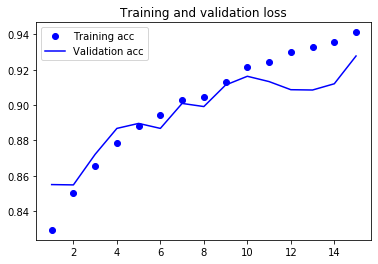

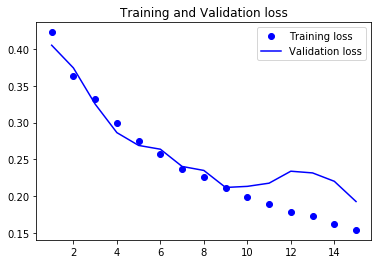

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("5classSoundModelGraph"+str(model_num)+"-1.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.savefig("5classSoundModelGraph"+str(model_num)+"-2.png")

plt.show()

### 실제 test set에 대해 잘못된 판별 갯수 파악

In [43]:
import glob
from tqdm import tqdm_notebook
testList = glob.glob("5_dataset/test/*/*.jpg")
total = [0, 0, 0, 0, 0, 0]
result = [0, 0, 0, 0, 0, 0]
print("Length : " + str(len(testList)))
for i in tqdm_notebook(range(len(testList))):
    predictNum = model.predict_classes(x_test[i:i+1, :], verbose = 0)
    _ArrRealNum = testList[i].split("\\")
    realNum = int(_ArrRealNum[1].split("fold")[-1])
    total[realNum] = total[realNum] + 1
    if(predictNum != realNum):
        result[realNum] = result[realNum] + 1
print("total : " , end = "")
print(total)
print("result : " , end = "")
print(result)
print("error% : ", end = "")
for i in range(6):
    temp = result[i] / total[i]
    temp = temp * 100
    print(round(temp, 3), end = ", ")

Length : 944



total : [86, 199, 199, 75, 186, 199]
result : [44, 59, 55, 3, 47, 54]
error% : 51.163, 29.648, 27.638, 4.0, 25.269, 27.136, 

In [14]:
num = [0, 0, 0, 0, 0, 0]
for i in y_test:
    for j in range(6):
        if(int(i[j]) == 1):
            num[j] += 1
for i in range(1, 6):
    num[i] = num[i] + num[i-1]
print("0 to " + str(num[0]))
print(str(num[0]+1) + " to " + str(num[1]))
print(str(num[1]+1) + " to " + str(num[2]))
print(str(num[2]+1) + " to " + str(num[3]))
print(str(num[3]+1) + " to " + str(num[4]))
print(str(num[4]+1) + " to " + str(num[5]))

0 to 86
87 to 285
286 to 484
485 to 559
560 to 745
746 to 944


In [38]:
num = 0
for i in range(len(testList)):
    print(str(num), end = " : ")
    print(model.predict_classes(x_test[i:i+1, :], verbose = 0), end = " , ")
    if(i%10==0 and i != 0):
        print("\n")
    if(i==86 or i == 285 or i == 484 or i == 559 or i == 745):
        print("\n===========================================================================")
        print("\n")
    num += 1

0 : [0] , 1 : [0] , 2 : [0] , 3 : [0] , 4 : [0] , 5 : [0] , 6 : [0] , 7 : [0] , 8 : [0] , 9 : [0] , 10 : [4] , 

11 : [0] , 12 : [0] , 13 : [0] , 14 : [4] , 15 : [0] , 16 : [4] , 17 : [4] , 18 : [0] , 19 : [0] , 20 : [0] , 

21 : [0] , 22 : [5] , 23 : [1] , 24 : [0] , 25 : [0] , 26 : [0] , 27 : [2] , 28 : [5] , 29 : [0] , 30 : [2] , 

31 : [4] , 32 : [2] , 33 : [2] , 34 : [0] , 35 : [4] , 36 : [2] , 37 : [0] , 38 : [0] , 39 : [0] , 40 : [0] , 

41 : [0] , 42 : [0] , 43 : [4] , 44 : [5] , 45 : [0] , 46 : [4] , 47 : [0] , 48 : [0] , 49 : [0] , 50 : [0] , 

51 : [0] , 52 : [0] , 53 : [0] , 54 : [0] , 55 : [0] , 56 : [0] , 57 : [0] , 58 : [5] , 59 : [0] , 60 : [0] , 

61 : [0] , 62 : [0] , 63 : [0] , 64 : [4] , 65 : [0] , 66 : [0] , 67 : [0] , 68 : [0] , 69 : [0] , 70 : [0] , 

71 : [0] , 72 : [0] , 73 : [0] , 74 : [0] , 75 : [0] , 76 : [0] , 77 : [0] , 78 : [0] , 79 : [0] , 80 : [0] , 

81 : [0] , 82 : [0] , 83 : [0] , 84 : [0] , 85 : [0] , 86 : [5] , 


87 : [5] , 88 : [5] , 89 : [5] , 9

### Keras ensemble

In [44]:
import glob
from keras.models import load_model
from tqdm import tqdm_notebook
fileList = glob.glob("6_ModelBackUp/*.h5")
testList = glob.glob("5_dataset/test/*/*.jpg")

models = list()
for file in tqdm_notebook(fileList):
    models.append(load_model(file))
    
num = 0
for i in tqdm_notebook(range(len(testList))):
    classPredict = [0, 0, 0, 0, 0, 0]
    answer = 5
    maximum = 0
    maxIndex = 0
    for model in models:
        tempPredict = model.predict_classes(x_test[i:i+1, :], verbose = 0)
        classPredict[int(tempPredict)] += 1
    for j in range(6):
        if(classPredict[j] > maximum):
            overlap = 0
            maximum = classPredict[j]
            maxIndex = j
    print(num, end = " -> ")
    num += 1
    print(classPredict, end = " : ")
    answer = maxIndex
    print(answer)
    if(i==86 or i == 285 or i == 484 or i == 559 or i == 745):
        print("\n===========================================================================")
        print("\n")

0 -> [6, 0, 0, 0, 0, 0] : 0
1 -> [5, 0, 0, 0, 0, 1] : 0
2 -> [6, 0, 0, 0, 0, 0] : 0
3 -> [6, 0, 0, 0, 0, 0] : 0
4 -> [6, 0, 0, 0, 0, 0] : 0
5 -> [6, 0, 0, 0, 0, 0] : 0
6 -> [6, 0, 0, 0, 0, 0] : 0
7 -> [4, 0, 1, 0, 1, 0] : 0
8 -> [2, 0, 0, 0, 0, 4] : 5
9 -> [1, 0, 0, 0, 0, 5] : 5
10 -> [0, 0, 0, 0, 2, 4] : 5
11 -> [6, 0, 0, 0, 0, 0] : 0
12 -> [6, 0, 0, 0, 0, 0] : 0
13 -> [5, 0, 0, 0, 0, 1] : 0
14 -> [6, 0, 0, 0, 0, 0] : 0
15 -> [6, 0, 0, 0, 0, 0] : 0
16 -> [1, 0, 0, 0, 0, 5] : 5
17 -> [0, 0, 0, 0, 1, 5] : 5
18 -> [6, 0, 0, 0, 0, 0] : 0
19 -> [6, 0, 0, 0, 0, 0] : 0
20 -> [6, 0, 0, 0, 0, 0] : 0
21 -> [6, 0, 0, 0, 0, 0] : 0
22 -> [0, 1, 0, 0, 0, 5] : 5
23 -> [0, 1, 0, 0, 0, 5] : 5
24 -> [6, 0, 0, 0, 0, 0] : 0
25 -> [6, 0, 0, 0, 0, 0] : 0
26 -> [5, 0, 1, 0, 0, 0] : 0
27 -> [6, 0, 0, 0, 0, 0] : 0
28 -> [0, 0, 5, 0, 0, 1] : 2
29 -> [0, 0, 3, 0, 0, 3] : 2
30 -> [1, 0, 0, 0, 0, 5] : 5
31 -> [2, 0, 1, 0, 0, 3] : 5
32 -> [1, 0, 0, 0, 0, 5] : 5
33 -> [2, 0, 0, 0, 0, 4] : 5
34 -> [6, 0, 0, 0, 0, 0]

541 -> [0, 0, 0, 6, 0, 0] : 3
542 -> [0, 0, 0, 6, 0, 0] : 3
543 -> [0, 0, 0, 6, 0, 0] : 3
544 -> [0, 0, 0, 6, 0, 0] : 3
545 -> [0, 0, 0, 6, 0, 0] : 3
546 -> [0, 0, 0, 6, 0, 0] : 3
547 -> [0, 0, 0, 6, 0, 0] : 3
548 -> [0, 0, 0, 6, 0, 0] : 3
549 -> [0, 0, 0, 6, 0, 0] : 3
550 -> [0, 0, 0, 6, 0, 0] : 3
551 -> [0, 0, 0, 6, 0, 0] : 3
552 -> [0, 0, 0, 6, 0, 0] : 3
553 -> [0, 0, 0, 6, 0, 0] : 3
554 -> [0, 0, 0, 6, 0, 0] : 3
555 -> [0, 0, 0, 6, 0, 0] : 3
556 -> [0, 0, 0, 6, 0, 0] : 3
557 -> [0, 0, 0, 6, 0, 0] : 3
558 -> [0, 0, 0, 6, 0, 0] : 3
559 -> [0, 0, 0, 0, 6, 0] : 4



560 -> [0, 0, 0, 0, 6, 0] : 4
561 -> [0, 0, 0, 0, 6, 0] : 4
562 -> [0, 0, 0, 0, 6, 0] : 4
563 -> [0, 0, 0, 0, 6, 0] : 4
564 -> [0, 0, 0, 0, 6, 0] : 4
565 -> [0, 0, 1, 0, 5, 0] : 4
566 -> [0, 0, 0, 0, 6, 0] : 4
567 -> [0, 0, 0, 0, 6, 0] : 4
568 -> [0, 0, 0, 0, 6, 0] : 4
569 -> [0, 0, 0, 0, 6, 0] : 4
570 -> [0, 0, 0, 0, 6, 0] : 4
571 -> [0, 0, 0, 0, 6, 0] : 4
572 -> [0, 0, 0, 0, 6, 0] : 4
573 -> [0, 0, 0, 0, 6, 0] : 4
574 -> 

In [46]:
print("test 100개당 잘못된 검출 횟수")
print(round((9/86)*100, 3))
print(round((29/(285-86+1))*100, 3))
print(round((13/(484-285+1))*100, 3))
print(round((4/(559-484+1))*100, 3))
print(round((19/(745-558)) * 100, 3)) # 배경음으로 잘 햇갈린다
print(round((42/(944-745))*100, 3))

test 100개당 잘못된 검출 횟수
10.465
14.5
6.5
5.263
10.16
21.106
